<a href="https://colab.research.google.com/github/winataaditya/portfolio_project/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House Pricing Prediction
Source dataset : https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?resource=download

###**1.1 Problem Statement**

Dalam menentukan harga rumah, banyak faktor yang perlu dipertimbangkan. Penentuan harga rumah merupakan hal yang krusial dan penting untuk dipertimbangkan dengan baik, karena penentuan harga yang terlalu tinggi dari harga pasaran akan berdampak pada penjualan rumah yang tidak kunjung laku. Hal ini tentu akan menambah biaya maintenance rumah yang semakin lama membutuhkan biaya yang banyak dan perlunya renovasi, dan pada akhirnya menurunkan nilai jual dari rumah itu sendiri. Selain itu, penentuan harga rumah yang terlalu murah berdampak pada kerugian dan kurang mendapat margin atau keutungungan yang maksimal. Oleh karenanya, menentukan harga rumah yang tepat adalah langkah yang bijak.

Banyak orang yang masih kebingungan dalam menentukan harga rumah yang tepat dan sesuai dengan harga pasaran yang ada, baik itu dari segi penjual dan pembeli.




### **1.2 Goals**

Dibutuhkan suatu model yang dapat memprediksi harga rumah dengan tepat sesuai dengan spesifikasi yang diberikan.

Dalam project ini, akan dibangun beberapa model machine learning yang dapat melakukan prediksi. Selain itu akan dilakukan perbandingan hasil dari model-model yang telah dibuat.

### **2. Exploratory Data Analysis**
EDA dalam project ini terdiri dari beberapa proses. Proses tersebut adalah

*   **Discovering** : Tahap yang dilakukan untuk mengenal karekteristik data, seperti melihat dimensi, feature-feature dan kolom yang ada, serta tipe seluruh kolom
*   **Validating** : Tahapan yang dilakukan untuk memeriksa apakah semua data sudah valid, tidak ada kesalahan penulisan, data kosong, ataupun outlier
*   **Cleaning** : Tahapan untuk membersihkan data baik itu menghilangkan outlier, menghapus missing values, atau membenarkan data yang tidak konsisten untuk menghasilkan kualitas data yang baik
*   **Structuring** : merangka data, seperti memperbaiki format data yang sesuai, ataupun menambahkan kolom baru untuk keperluan tertentu
*   **Joining** : Menggambungkan beberapa data agar menghasilkan data yang lengkap

Tahapan diatas bersifat iteratif dan tidak ada urutannya



In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [13]:
#Load dataset
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Dalam preview data diatas, karena yang akan diprediksi adalah harga, maka feature price adalah variabel target.

####2.1 Discovering Process

In [14]:
#Melihat informasi-informasi feature pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Dalam output di atas, kita dapat menyimpulkan hal-hal berikut.
*   Jumlah record data/rows adalah 545
*   Jumlah feature/kolom/variabel 13
*   Tidak ditemukan adanya missing value dalam data tersebut
*   feature-feature kategori adalah mainroad(nominal), guestroom(nominal), basement(nominal), hotwaterheating(nominal), airconditioning(nominal), prefarea(nominal), furnishingstatus (ordinal), bedrooms (ordinal), badrooms(ordinal), stories(ordinal), dan parking(ordinal)
*   feature-feature numerik adalah price dan area











In [15]:
#Melihat deskripsi statistik data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


####2.2 Structuring
Agar memudahkan pembacaan nominal pada variable price, akan dibuat feature baru yang akan memudahkan pembaca (untuk tujuan visualisasi).

In [16]:
def readable_numbers(x):
  """ mengubah format angka ke dalam format yang mudah dibaca seprti K untuk ribuan, M untuk jutaan """
  if x >=1e6:
    s = '{:1.1f}M'.format(x*1e-6)
  else:
    s = '{:1.0f}K'.format(x*1e-3)
  return s

#Menggunakan fungsi readable_function() untuk membuat kolom baru
df['readable_price'] =df['price'].apply(readable_numbers)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,readable_price
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.3M
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.2M
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.2M
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.2M
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.4M


#### 2.3 Validating dan Cleaning

In [18]:
#Memeriksa missing value
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
readable_price      0
dtype: int64

Output diatas menunjukkan bahwa tidak ditemukannya adanya missing value pada data, sehingga data terbebas dari missing value

In [19]:
#Memeriksa duplikasi data
df.duplicated().sum()

0

Output diatas menunjukkan tidak adanya data duplikat

In [9]:
#Memfilter feature numerik dan katgorial
numerics = ['price', 'area']
category = ['bedrooms','bathrooms','stories','mainroad','guestroom','basement',
           'hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

Visualisasi Boxplot price


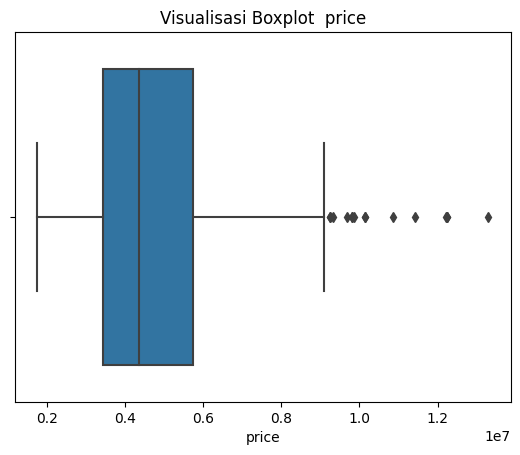

Visualisasi Boxplot area


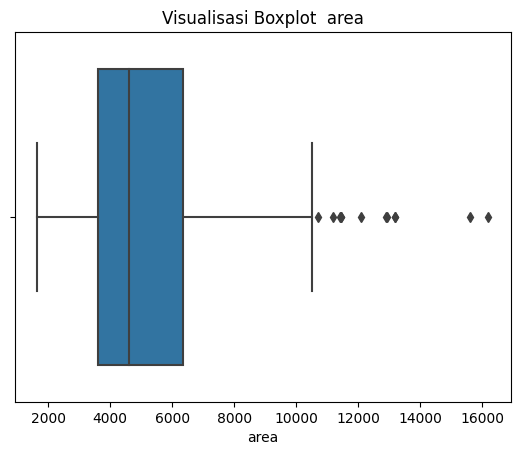

In [20]:
#Mengecek outlier untuk feature bedrooms, bathrooms, stories, parking menggunakan boxplot
for i in numerics:
    print(f'Visualisasi Boxplot {i}')
    sns.boxplot(data=df,x=i)
    plt.title(f'Visualisasi Boxplot  {i}')
    plt.show()

Dari ouput boxplot diatas ditemukan adanya outlier atau data pecilan yang ditunjukkan dengan lingkaran berwarna hitam. Hanya saja perlu kita analisis bahwa apakah benar data-data yang dianggap sebagai outlier tersebut benar benar merupakan data outlier.

Sebelumnya perlu dipahami terlebih dahulu, jika outlier adalah sebuah data yang nilainya sangat ekstrem atau sangat berbeda jauh dari obeservasi lainnya. Data ini bisa muncul karena kesalahan input. Misalkan ada data usia 15, 40, 20, 210. data 210 disini bisa dipastikan sebagai outlier karena tentu tidak mungkin usia seseorang bisa mencapai 210, sehingga data ini dianggap sebagai outlier karena kesalahan input, tetapi ada juga data yang dianggap outlier tetapi sebenarnya data tersebut tidak benar-benar sebagai outlier karena data dilapangan/diperoleh memang seperti itu. Misalkan data gaji berikut: 1jt, 1,5jt, 4jt, 150jt. Mungkin, data 150jt tersebut akan dianggap sebagai outlier karena nilainya sangat berbeda dari data lainnya. Tetapi data ini masih masuk ke dalam konteks, karena tentu bisa saja ada seseorang yang memiliki gaji sebesar itu, hal ini dapat dipengaruhi dari variabel-variabel lainnya.

Dalam kasus ini outlier pada variabel price dan area, bukanlah outlier yang berasal dari kesalahan input, sehingga outlier ini tidak akan dihilangkan.

---
Langkah selanjutnya adalah melihat distribusi data.

Visualisasi Histogram dari price


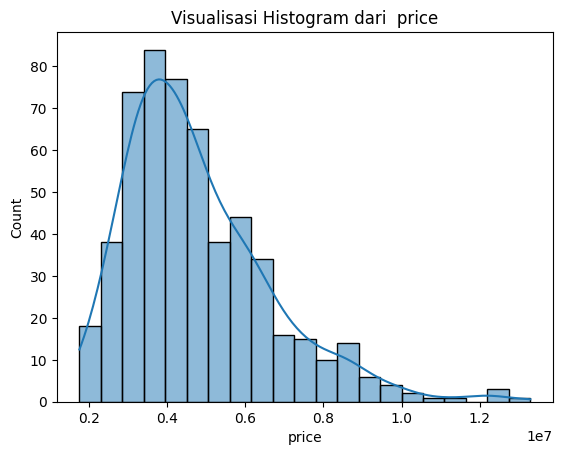

Visualisasi Histogram dari area


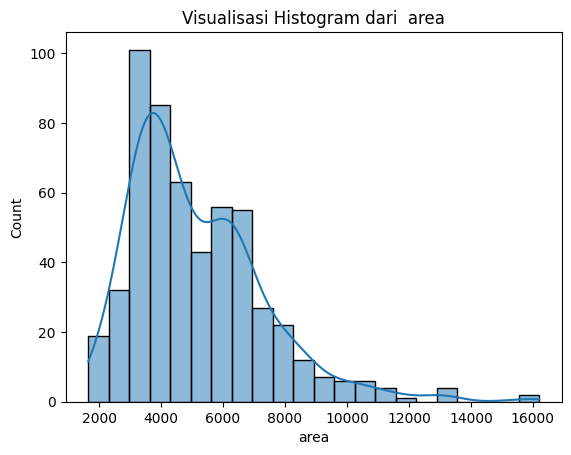

In [21]:
#Melihat distribusi data dari tiap-tiap data feature bertipe numerik
for i in numerics:
    print(f'Visualisasi Histogram dari {i}')
    sns.histplot(data=df,x=i, kde=True)
    plt.title(f'Visualisasi Histogram dari  {i}')
    plt.show()

Diagram Batang dari bedrooms


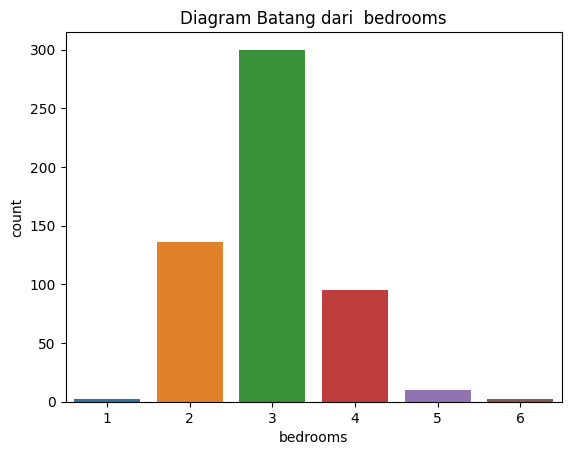

Diagram Batang dari bathrooms


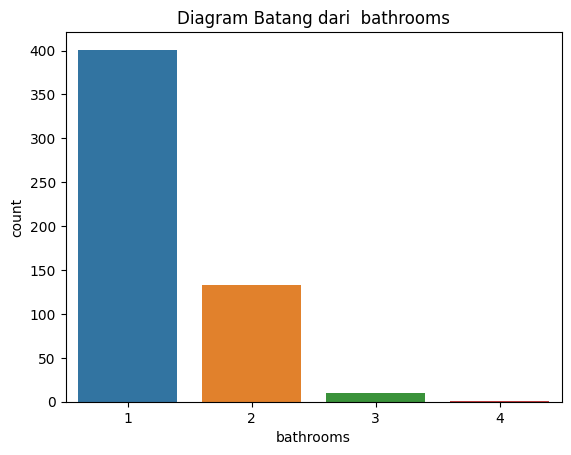

Diagram Batang dari stories


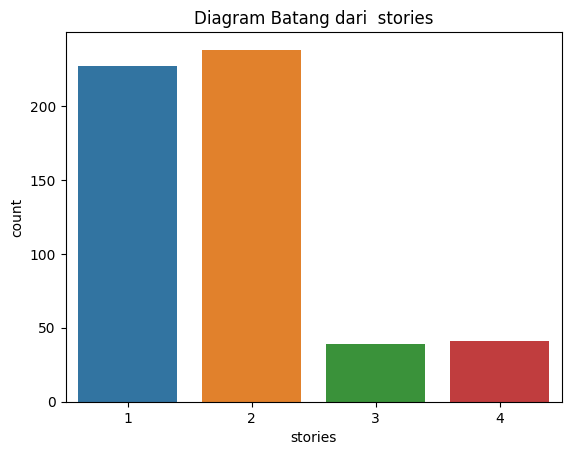

Diagram Batang dari mainroad


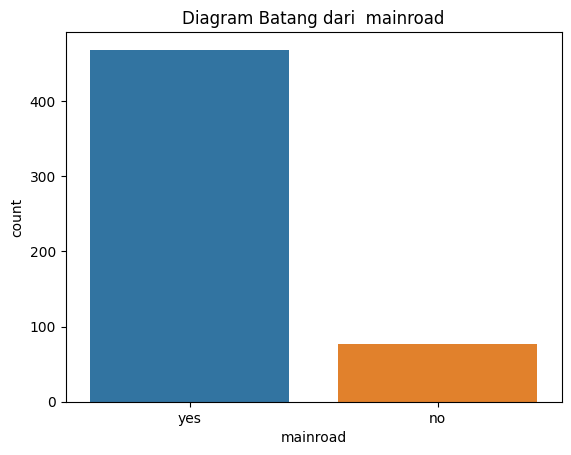

Diagram Batang dari guestroom


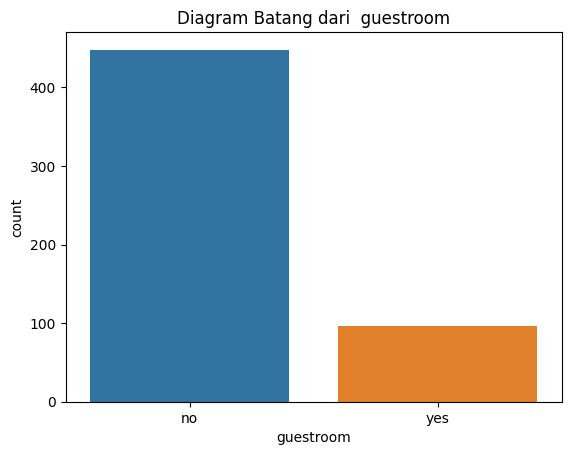

Diagram Batang dari basement


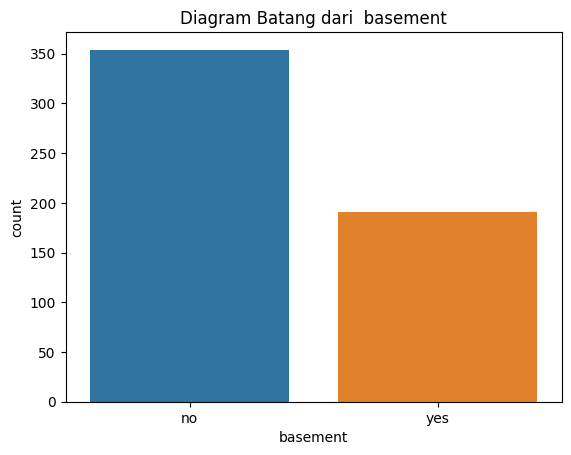

Diagram Batang dari hotwaterheating


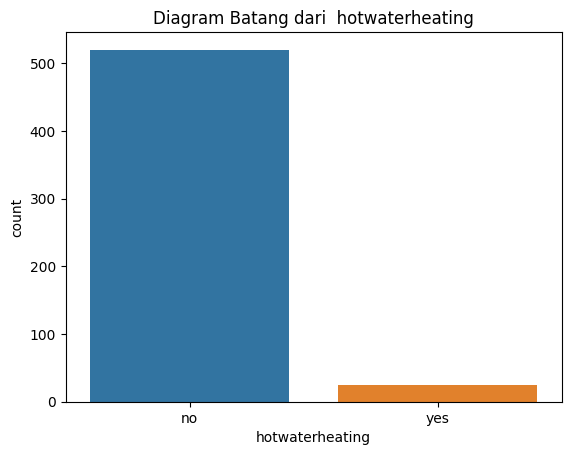

Diagram Batang dari airconditioning


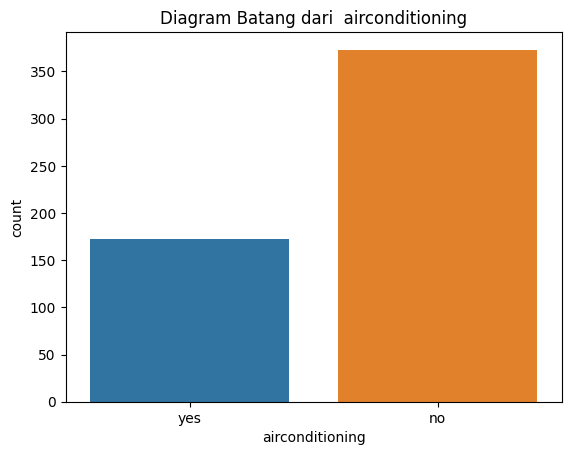

Diagram Batang dari parking


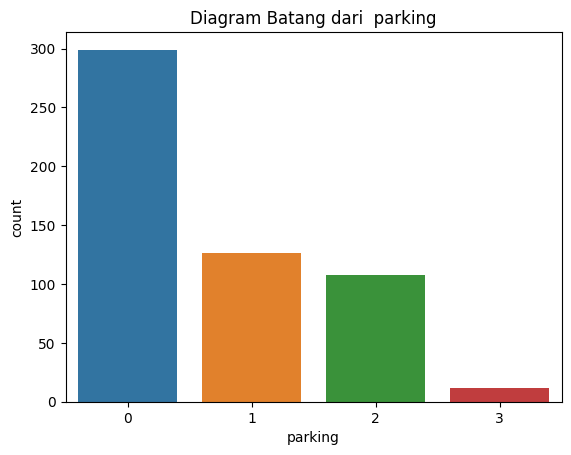

Diagram Batang dari prefarea


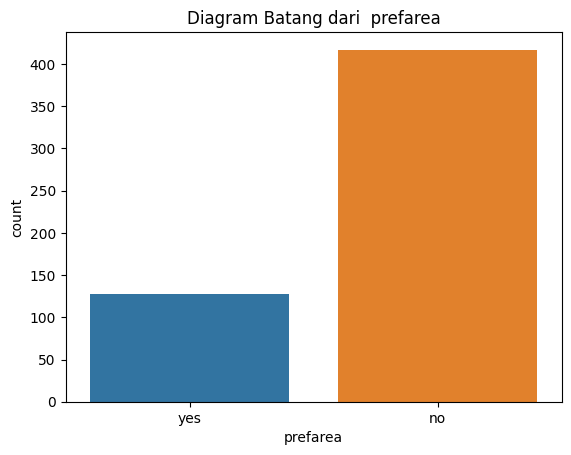

Diagram Batang dari furnishingstatus


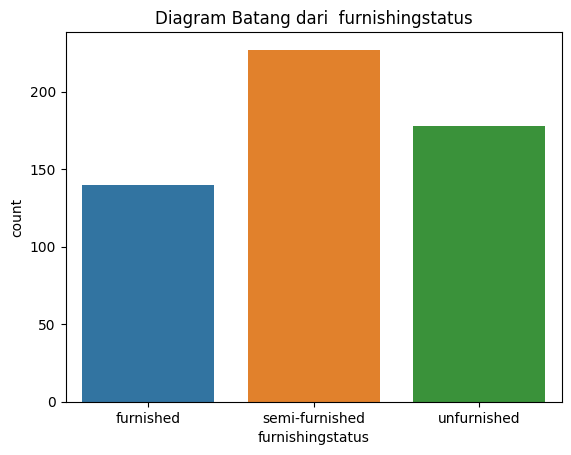

In [22]:
#Melihat distribusi data dari tiap-tiap data feature bertipe numerik
for i in category:
    print(f'Diagram Batang dari {i}')
    sns.countplot(data=df,x=i)
    plt.title(f'Diagram Batang dari  {i}')
    plt.show()

Dari semua plot yang dihasilkan diatas, semua data konsisten, tidak ditemukan adanya data yang tidak konisten seperti mispeling/kesalahan ketik

Krena feature area memiliki skala yang sangat jauh dengan feature yang lain, maka perlu dilakukan normalisasi pada feature area.

In [23]:
from sklearn.preprocessing import MinMaxScaler
#Normalisasi feature numerik menggunakan MinMaxScaler
scaler = MinMaxScaler()
numerics_normalized = scaler.fit_transform(df[numerics])
numerics_normalized

array([[1.        , 0.39656357],
       [0.90909091, 0.5024055 ],
       [0.90909091, 0.57113402],
       ...,
       [0.        , 0.13539519],
       [0.        , 0.08659794],
       [0.        , 0.15120275]])

In [24]:
#Karena data yang sudah kita normalisakikan berbentuk array, kita perlu mengubahnya ke dalam bentuk dataframe
numerics_normalized = pd.DataFrame(numerics_normalized, columns=numerics)

#karena price merupakan variabel target, maka variabel tersebut tidak perlu dinormalisasikan
numerics_normalized =numerics_normalized.drop('price',axis=1)
numerics_normalized.head()

,area
0,0.396564
1,0.502405
2,0.571134
3,0.402062
4,0.396564


####2.4 Structuring 2 (Transforming Cetgorial Data)

Tahapan selanjutnya adalah mentransormasi data yang bebentuk ketegorial(string) untuk diubah ke data kategorial(numerik). Untuk jenis data nominal akan diubah menggunakan ke dalam kode numerikal, sedangkan data ordinal akan diubah ke dalam data dummy

In [25]:
nominal = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
ordinal = ["furnishingstatus", "bedrooms", "bathrooms", "stories", "parking"]

In [26]:
#Karena fungsi .cat hanya dapat digunakan untuk datatype category, maka kita perlu mengubah tipe data object menjadi category
df[nominal] = df[nominal].astype('category')

#Karena fungsi .cat hanya bisa digunakan untuk satu kolom saja, maka akan digunakan perulangan
for col in nominal:
  df[col] = df[col].cat.codes

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,readable_price
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,13.3M
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,12.2M
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,12.2M
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,12.2M
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,11.4M


In [27]:
#Merubah data ordinal ke variabel dummy
ordinal_dummies = pd.get_dummies(data=df[ordinal],columns=ordinal,drop_first=True)
ordinal_dummies.head()

,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


####2.5 Joinning
langkah selanjutnya adalah menggabungkan data-data yang telah dilakukan normalisasi, kategory, dan encoding ke data originalnya

In [28]:
"""Kita hapus terlebih dahulu variabel-variabel yang sebelumnya belum kita normalisasikan dan tranformasi
dummy (area dan data ordinal) di data original untuk nanti mengganti variabel tersebut yang telah kita lakukan normalisasi dan transformasi"""

df = df.drop(ordinal, axis=1)
df = df.drop("area", axis=1)
df.head()

,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,readable_price
0,13300000,1,0,0,0,1,1,13.3M
1,12250000,1,0,0,0,1,0,12.2M
2,12250000,1,0,1,0,0,1,12.2M
3,12215000,1,0,1,0,1,1,12.2M
4,11410000,1,1,1,0,1,0,11.4M


In [29]:
#Selanjutnya kita tambahkan data yang tadi telah kita normalisasi dan transformasikan
df = pd.concat([df,numerics_normalized,ordinal_dummies] ,axis=1)
df.head()

,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,readable_price,area,furnishingstatus_semi-furnished,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
0,13300000,1,0,0,0,1,1,13.3M,0.396564,0,...,0,1,0,0,0,1,0,0,1,0
1,12250000,1,0,0,0,1,0,12.2M,0.502405,0,...,0,0,0,1,0,0,1,0,0,1
2,12250000,1,0,1,0,0,1,12.2M,0.571134,1,...,0,1,0,0,1,0,0,0,1,0
3,12215000,1,0,1,0,1,1,12.2M,0.402062,0,...,0,1,0,0,1,0,0,0,0,1
4,11410000,1,1,1,0,1,0,11.4M,0.396564,0,...,0,0,0,0,1,0,0,0,1,0


###3. Feature Selection
Pada tahap ini, akan dilakukan seleksi fitur yang akan digunakan untuk membangun model. Pemilihan fitur dapat dilakukan dengan menghilangkan fitur yang sama sekali tidak memiliki pengaruh terhadap variabel target. Misalnya feature-feature identitas seperti nama atau ID. Pemilihan feature dapat pula dilakukan dengan melihat nilai korelasi matrix.


<ipython-input-51-f4ea21f221fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_matrix = df.corr()


                                    price  mainroad  guestroom  basement  \
price                            1.000000  0.296898   0.255517  0.187057   
mainroad                         0.296898  1.000000   0.092337  0.044002   
guestroom                        0.255517  0.092337   1.000000  0.372066   
basement                         0.187057  0.044002   0.372066  1.000000   
hotwaterheating                  0.093073 -0.011781  -0.010308  0.004385   
airconditioning                  0.452954  0.105423   0.138179  0.047341   
prefarea                         0.329777  0.199876   0.160897  0.228083   
area                             0.535997  0.288874   0.140297  0.047417   
furnishingstatus_semi-furnished  0.063656  0.011450   0.005821  0.050284   
furnishingstatus_unfurnished    -0.280587 -0.133123  -0.099023 -0.117935   
bedrooms_2                      -0.350144 -0.009560  -0.090959 -0.121415   
bedrooms_3                       0.111247  0.035850   0.044412  0.091708   
bedrooms_4  

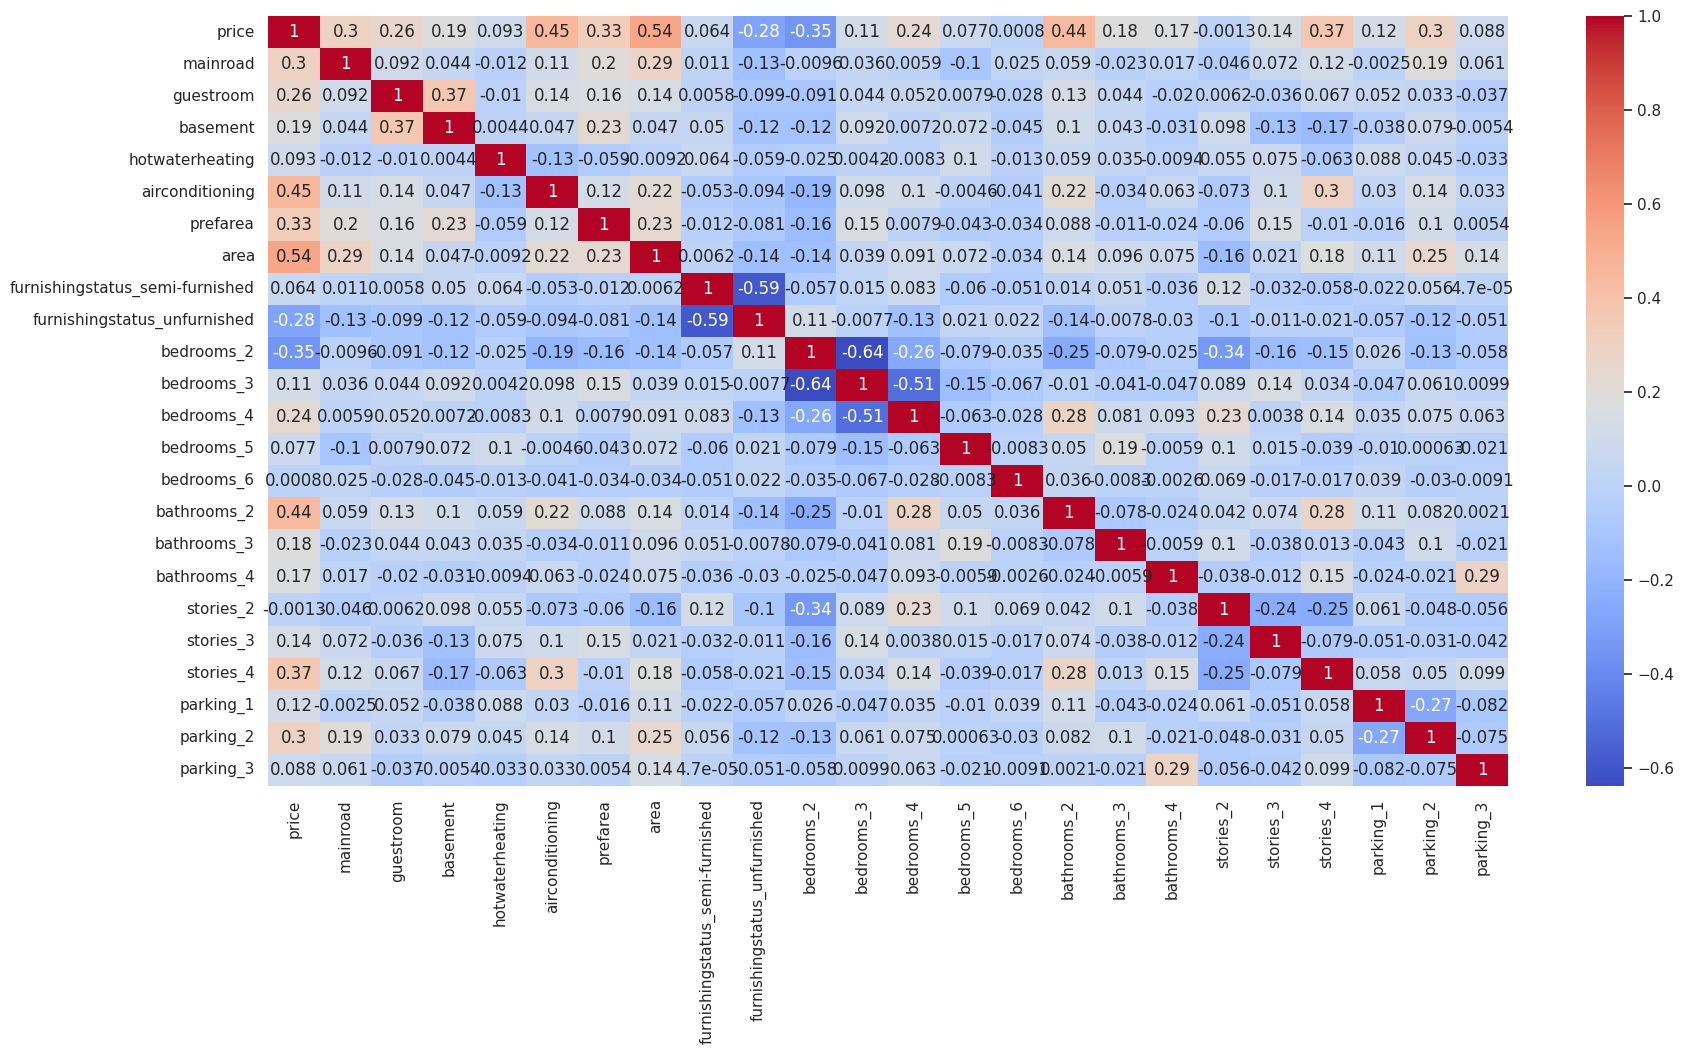

In [51]:
#Membuat korelasi matrix untuk dataset
df_corr_matrix = df.corr()
print(df_corr_matrix)

# membuat visualisasi heatmap menggunakan fungsi `heatmap` Seaborn
sns.heatmap(df_corr_matrix, cmap='coolwarm', annot=True)
sns.set(rc = {'figure.figsize': (20,15)})
plt.show()

In [52]:
#Melihat nilai korelasi seluruh feature terhadap variabel target(price)
cor_target = abs(df_corr_matrix["price"])
cor_target

price                              1.000000
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
airconditioning                    0.452954
prefarea                           0.329777
area                               0.535997
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished       0.280587
bedrooms_2                         0.350144
bedrooms_3                         0.111247
bedrooms_4                         0.236783
bedrooms_5                         0.077043
bedrooms_6                         0.000804
bathrooms_2                        0.438572
bathrooms_3                        0.184026
bathrooms_4                        0.171691
stories_2                          0.001251
stories_3                          0.136486
stories_4                          0.372673
parking_1                          0.124323
parking_2                       

Kita bisa saja hanya memilih feature dengan nilai korelasi yang signifikan saja (>0.5) tetapi dalam kasus ini, akan dipilih seluruh feature. Meskipun beberapa feature tidak menunjukkan nilai korelasi yang terlalu signifikan, tetapi feature tersebut tetap mempengaruhi feature target, sehingga diharapkan dapat menambah hasil akurasi model

###4. Construct Prediction Model
Selanjutnya adalah tahap membuat model. Di tahap ini, model akan dilatih menggunakan data training sebelum dilakukan pengujian menggunakan data uji.

In [53]:
df.head()

,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,readable_price,area,furnishingstatus_semi-furnished,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
0,13300000,1,0,0,0,1,1,13.3M,0.396564,0,...,0,1,0,0,0,1,0,0,1,0
1,12250000,1,0,0,0,1,0,12.2M,0.502405,0,...,0,0,0,1,0,0,1,0,0,1
2,12250000,1,0,1,0,0,1,12.2M,0.571134,1,...,0,1,0,0,1,0,0,0,1,0
3,12215000,1,0,1,0,1,1,12.2M,0.402062,0,...,0,1,0,0,1,0,0,0,0,1
4,11410000,1,1,1,0,1,0,11.4M,0.396564,0,...,0,0,0,0,1,0,0,0,1,0


In [61]:
#definisikan terlebih dahulu variabel independent(X) dan variabel target(dependent = y)
X = df.iloc[: , 1:26].drop('readable_price', axis = 1)
y = df['price']

RangeIndex(start=0, stop=545, step=1)

In [62]:
#Membagi dataset ke dalam data training dan data testing dengan perbandingan 80% dan 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Metode yang dipakai untuk membentuk model adalah berikut.

*   Regresi Linear
*   Decision Tree
*   Random Forest



In [66]:
#Import model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

models = [linear_regression, decision_tree, random_forest]

In [70]:
#Melatih model dan melakukan proses pengujian
from sklearn.metrics import mean_absolute_error,mean_squared_error

for model in models:
    print(f'{model} : ')
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print()
    print('Metrik Performa Model untuk Data Training : ')
    mae_train = mean_absolute_error(y_train,y_pred_train)
    print('MAE train : ',mae_train)
    mse_train = mean_squared_error(y_train,y_pred_train)
    print('RMSE train : ',np.sqrt(mse_train))
    print()
    print('Metrik Performa Model untuk Data Training :')
    mae_test = mean_absolute_error(y_test,y_pred_test)
    print('MAE test : ',mae_test)
    mse_test = mean_squared_error(y_test,y_pred_test)
    print('RMSE test : ',np.sqrt(mse_test))
    print()
    print('Koefesien Determinasi (R square) : ',model.score(X_train,y_train))
    print('-'*50)
    print()

LinearRegression() : 

Metrik Performa Model untuk Data Training : 
MAE train :  701304.9015933473
RMSE train :  971282.2040482268

Metrik Performa Model untuk Data Training :
MAE test :  948916.4170412607
RMSE test :  1329664.683963073

Koefesien Determinasi (R square) :  0.6940418200678746
--------------------------------------------------

DecisionTreeRegressor() : 

Metrik Performa Model untuk Data Training : 
MAE train :  8107.798165137615
RMSE train :  67088.47540457372

Metrik Performa Model untuk Data Training :
MAE test :  1242885.3211009174
RMSE test :  1804851.8548318332

Koefesien Determinasi (R square) :  0.9985402884288594
--------------------------------------------------

RandomForestRegressor() : 

Metrik Performa Model untuk Data Training : 
MAE train :  286726.8399847095
RMSE train :  422179.1422723622

Metrik Performa Model untuk Data Training :
MAE test :  1062765.544648318
RMSE test :  1494580.9905929607

Koefesien Determinasi (R square) :  0.9421950869898067
----

Metrik yang digunakan untuk mengukur performa model diatas adalah Koefisien Determinasi atau R Square. R Square mengukur seberapa baik model dalam melakukan prediksi, dimana nilainya berada dalam rentang 0 sampai 1. 0 menunjukan performa model buru, sedangkan 1 menunjukan performa model sangat baik. Berdasarkan output yang diperoleh maka dapat disimpulkan sebagai berikut.


*   *Model Linear regresi* : Keakuratan model dalam memprediksi harga rumah sebesar 69,40%. Dimana nilai tersebut menunjukkan hasilnya hanya cukup, tetapi model ini masih harus dilakukan kembali proses training ataupun tunning parameter agar mendapat hasil yang lebih baik lagi. Model ini belum bisa diimplementasikan untuk memprediksi harga rumah.

*   *Decision Tree* : Keakuratan model dalam memprediksi harga rumah sebesar 99,85%. Hasil ini menunjukkan nilai yang sangat baik karena mendekati 100%. Sehingga model yang dibangun dapat dengan sangat baik melakukan prediksi harga rumah. Model ini sudah siap untuk diimplementasikan untuk memprediksi harga rumah.
*   *Random Forest* : Keakuratan model dalam memprediksi harga rumah sebesar 94,22%. Hasil ini menunjukkan nilai yang sangat baik karena berada dalam rentang 90-100%. Sehingga model yang dibangun dapat dengan sangat baik melakukan prediksi harga rumah. Model ini juga sudah siap untuk diimplementasikan untuk memprediksi harga rumah.

Hasil yang telah diperoleh diatas menunjukkan bahwa model DecisionTree adalah model terbaik dalam melakukan prediksi harga rumah untuk dataset ini.

